# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

Dataset: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [108]:
df = pd.read_csv('stroke_data_raw.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [110]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


- Target: stroke (0 atau 1, imbalanced → hanya 4.87% yang stroke)
- Ada missing value di kolom bmi (4909/5110 terisi → 201 missing)
- Fitur kategorikal: gender, ever_married, work_type, Residence_type, smoking_status
- Fitur numerik: age, avg_glucose_level, bmi
- Kolom id adalah identifier → akan di-drop saat preprocessing

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

/tmp/ipython-input-446520681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set2')


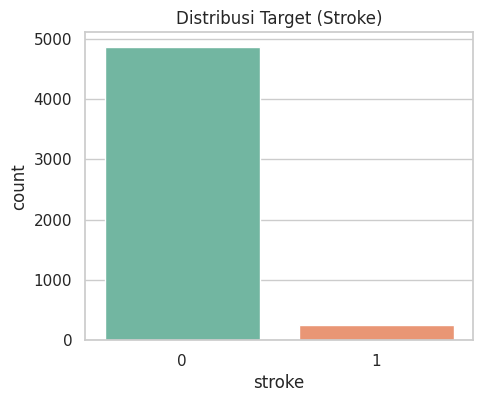

In [111]:
# Set style
sns.set(style="whitegrid")

# Distribusi target
plt.figure(figsize=(5,4))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title("Distribusi Target (Stroke)")
plt.show()

In [112]:
# Persentase stroke
stroke_percent = df['stroke'].value_counts(normalize=True) * 100
stroke_percent

,proportion
stroke,
0,95.127202
1,4.872798


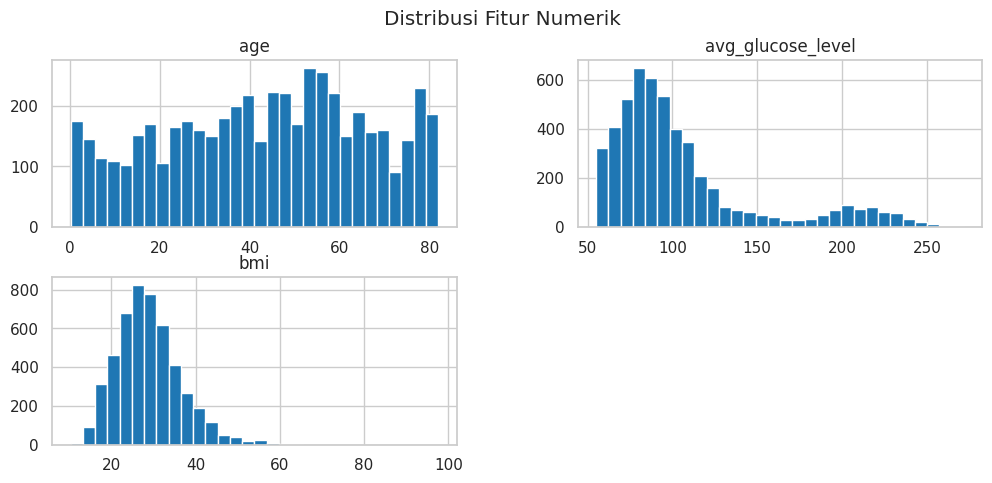

In [113]:
# Distribusi numerik
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols].hist(bins=30, figsize=(12, 5), color='#1f77b4')
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

/tmp/ipython-input-2910063297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')
/tmp/ipython-input-2910063297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')
/tmp/ipython-input-2910063297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')
/tmp/ipython-input-2910063297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

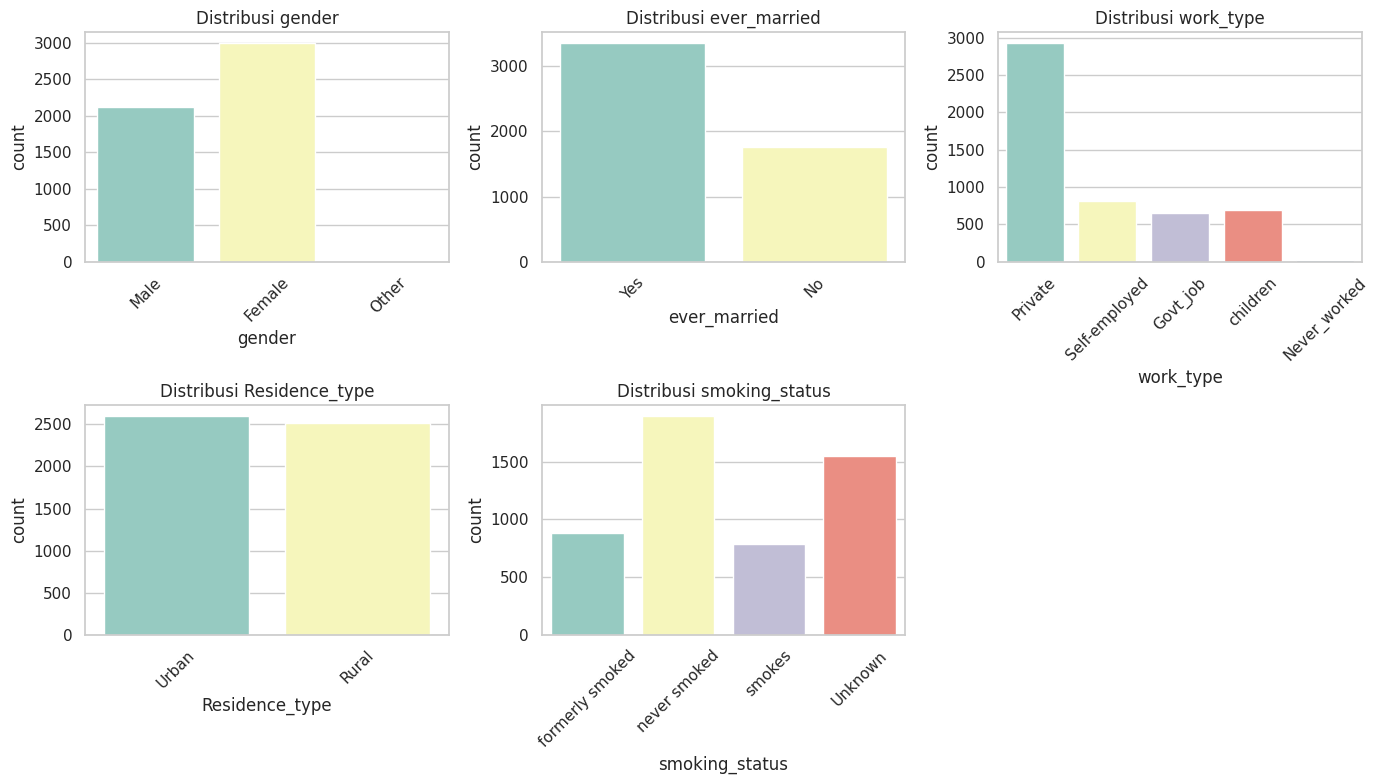

In [114]:
# Distribusi kategori
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(14,8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, palette='Set3')
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

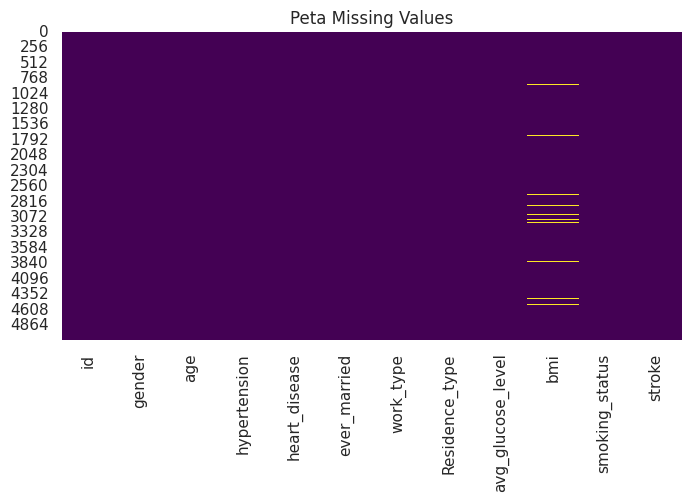

In [115]:
# Missing values heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Peta Missing Values")
plt.show()

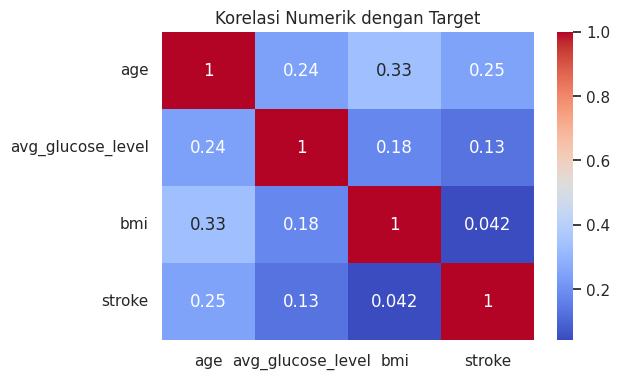

In [116]:
# Korelasi numerik
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols + ['stroke']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Numerik dengan Target")
plt.show()

/tmp/ipython-input-2759304403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, palette='Set2')
/tmp/ipython-input-2759304403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, palette='Set2')
/tmp/ipython-input-2759304403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, palette='Set2')


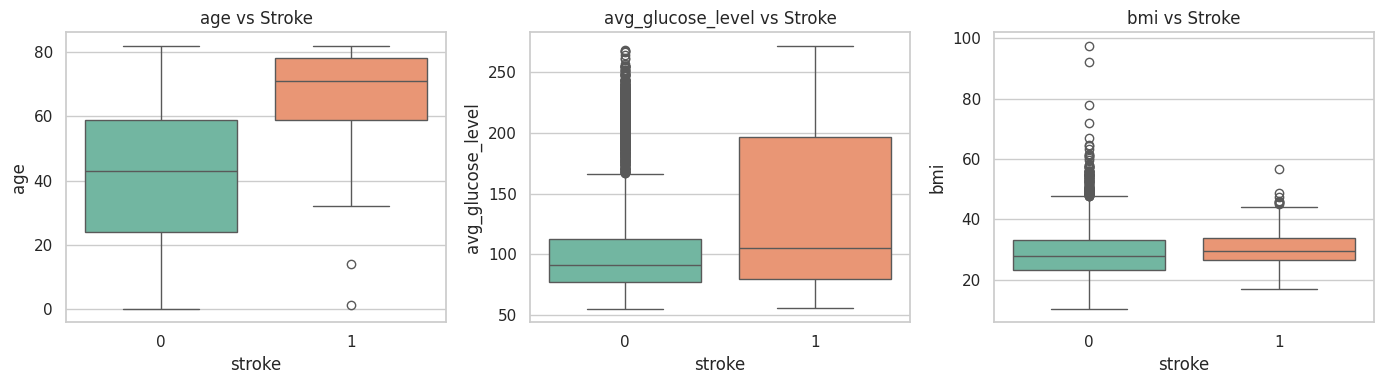

In [117]:
# Boxplot numerik vs target
plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Stroke")
plt.tight_layout()
plt.show()

In [118]:
# Analisis kategori vs target
cat_target = {}
for col in cat_cols:
    prop = pd.crosstab(df[col], df['stroke'], normalize='index') * 100
    cat_target[col] = prop

cat_target['gender']

stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383
Other,100.000000,0.000000


- Distribusi Target: Stroke hanya terjadi pada sebagian kecil data (~5%).
- Distribusi Fitur Numerik:
  - age condong ke populasi dewasa/tua.
  - avg_glucose_level dan bmi sedikit right-skewed.
- Distribusi Fitur Kategori:  Mayoritas responden pernah menikah, work type bervariasi, smoking status banyak missing atau “Unknown”.
- Missing Values: bmi punya missing.
- Korelasi Numerik: age punya korelasi positif moderat dengan stroke.
- Boxplot: Distribusi fitur numerik berbeda antara stroke dan non-stroke.
- Proporsi kategori vs stroke: Terlihat perbedaan kecil per kategori, misalnya “Other” di gender tidak ada stroke.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [120]:
# Hapus duplikat
initial_shape = df.shape
df = df.drop_duplicates()
duplicates_removed = initial_shape[0] - df.shape[0]

print(f"Shape awal: {initial_shape}")
print(f"Shape setelah menghapus duplikat: {df.shape}")
print(f"Jumlah duplikat yang dihapus: {duplicates_removed}")

Shape awal: (5110, 12)
Shape setelah menghapus duplikat: (5110, 12)
Jumlah duplikat yang dihapus: 0


In [121]:
# Tangani missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [122]:
# Tentukan kolom kategorikal & numerikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'id' in df.columns:
    df = df.drop(columns=['id'])

target_col = 'stroke'
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

In [124]:
# Hapus outlier (IQR)
def remove_outliers_iqr(data, columns):
    df_out = data.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

df_no_outliers = remove_outliers_iqr(df, ['age', 'avg_glucose_level', 'bmi'])
print("Shape setelah menghapus outlier:", df_no_outliers.shape)

Shape setelah menghapus outlier: (4383, 11)


In [125]:
# Encoding kategorikal (LabelEncoder)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_no_outliers[col] = le.fit_transform(df_no_outliers[col])
    label_encoders[col] = le

In [126]:
print("Mapping Label Encoding:")
for col, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")

Mapping Label Encoding:
gender: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
ever_married: {'No': np.int64(0), 'Yes': np.int64(1)}
work_type: {'Govt_job': np.int64(0), 'Never_worked': np.int64(1), 'Private': np.int64(2), 'Self-employed': np.int64(3), 'children': np.int64(4)}
Residence_type: {'Rural': np.int64(0), 'Urban': np.int64(1)}
smoking_status: {'Unknown': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}


In [127]:
# Gabungkan semua fitur & target
df_clean = df_no_outliers.copy()
df_clean.to_csv("stroke_data_clean.csv", index=False)

print("Preprocessing selesai. Shape akhir:", df_clean.shape)
df_clean.head()

Preprocessing selesai. Shape akhir: (4383, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.1,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1
